***⚡️ TEAM TIMESHOCK ⚡️***

**NOTE to Saeed**: 

To run the code we had manually created a "train" directory and "test" directory. We have attached the zip file with train and test folders.

Disclaimer: ChatGPT was mainly used in the folder creation for cropped images and in the live stream video

<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Introduction to Deep Learning </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[DSAIS]</a> MSc in Data Science & Artificial Intelligence Strategy <br/>
         Paris | © Saeed VARASTEH
    </span>
</div>

<div class="alert-info" style="border-bottom: solid 1px lightgray; background-color:#ece4f5;">
    <img src="images/assignment.png" style="height:60px; float:left; padding-right:10px;" />
    <span style="font-weight:bold; color:#8966b0">
        <h4 style="padding-top:25px;"> FINAL PROJECT </h4>
    </span>
</div>

###  DSAIS Face Recognition Application


In this project, you'll build a facial recognition system to recognize all of your friends.

Face recognition problems generally fall into one of two categories:

- __Face verification__, where you build a model to distinguish your face from others. This is a binary classification problem.
- __Face Recognition__, where you build a model to identify multiple faces. This is a multi-class classification problem.

Imagine a system for the Emlyon building where we want to provide face recognition to allow students to enter the building.

The goal is to fine-tune the classification head of __FaceNet__ to classify all your friends.

The project consists of two phases. 

- __Face Detection:__ In the first phase, you will need to prepare your datasets; you will use the __MTCNN__ model to create cropped face images from your raw images and store them in new directories.

- __Face Recognition:__ The second phase is very similar to what we did with transfer learning. You modify the classifier head of __FaceNet__ and train it on the cropped face images.

You will find FaceNet documentation here: [FaceNet](https://github.com/timesler/facenet-pytorch)

Finally, you can use your trained model to test it on test data.

__Extra step (high bounce!)__:

Build a Python application that shows recognized faces of DSAIS students on video feeds (or real-time images from the camera). 

---

### Getting face samples

For this project, you will need eleven photos of yourself and each of your friends on which to base your facial recognition application. 

You will have to work together to get them. 

__The sooner you take your photos and share them with others, the easier it will be for everyone to start working on the project.__

Let us say the deadline for uploading your pictures is <span style="color:crimson">Sunday, February 25, 23:59.</span>

Once you have your photos, post them [here](https://drive.google.com/drive/folders/1O8InPDGGy1eK7qjT92rL0DU9nd16lbo8?usp=sharing) under your name:

In [1]:
from facenet_pytorch import MTCNN, InceptionResnetV1, training
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import numpy as np
import pandas as pd
import os


import torch
import torch.nn as nn
import torch.optim as optim

import cv2


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


#### OpenCV Library

Install the opencv library if you do not have it. It is needed to access the camera on your machine.

In [3]:
#!pip install opencv-python

----

### Phase 01: Face detection

### Preprocess Input Image

In [4]:
image_transform = transforms.Compose([
    transforms.ToTensor()
])

In [5]:
## Create folders for train_cropped images

from pathlib import Path
from PIL import Image
from facenet_pytorch import MTCNN
import torch

# Initialize MTCNN
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(
    keep_all=False,
    device=device
)

# Paths to the source and target directories
source_directory = Path('./samples/train')
target_directory = Path('./samples/train_cropped')
target_directory.mkdir(parents=True, exist_ok=True)  # Ensure target directory exists

# Function to process a batch of images
def process_batch(images, batch_paths):
    crops = [str(p).replace(str(source_directory), str(target_directory)) for p in batch_paths]
    # Ensure each target directory exists
    for crop_path in crops:
        Path(crop_path).parent.mkdir(parents=True, exist_ok=True)
    mtcnn(images, save_path=crops)
    return crops

# Processing images
crop_paths = []
for person_folder in source_directory.iterdir():
    if person_folder.is_dir():
        # Adjust glob patterns to include different file extensions
        image_files = [image_file for ext in ['*.jpg', '*.JPG', '*.jpeg', '*.JPEG','*.png','*.PNG'] 
                       for image_file in person_folder.glob(ext)]
        for image_file in image_files:
            with Image.open(image_file) as img:
                img = img.convert('RGB')  # Ensure image is in RGB
                crops = process_batch([img], [image_file])
                crop_paths.extend(crops)
                print(f'Processed {image_file}')

print("All images processed and saved successfully.")


Processed samples/train/Gautier/2024-02-24 18-08-12.jpg
Processed samples/train/Gautier/2024-02-24 18-08-13.jpg
Processed samples/train/Gautier/2024-02-24 18-08-07.jpg
Processed samples/train/Gautier/2024-02-24 18-08-29.jpg
Processed samples/train/Gautier/2024-02-24 18-08-15.jpg
Processed samples/train/Gautier/2024-02-24 18-08-44.jpg
Processed samples/train/Gautier/2024-02-24 18-08-46.jpg
Processed samples/train/Gautier/2024-02-24 18-08-21.jpg
Processed samples/train/Gautier/2024-02-24 18-08-20.jpg
Processed samples/train/Gautier/2024-02-24 18-08-23.jpg
Processed samples/train/Alexandre/WIN_20240223_16_57_53_Pro.jpg
Processed samples/train/Alexandre/WIN_20240223_16_57_53_Pro (2).jpg
Processed samples/train/Alexandre/WIN_20240223_16_57_42_Pro.jpg
Processed samples/train/Alexandre/WIN_20240223_16_57_52_Pro.jpg
Processed samples/train/Alexandre/WIN_20240223_16_57_49_Pro.jpg
Processed samples/train/Alexandre/WIN_20240223_16_57_50_Pro.jpg
Processed samples/train/Alexandre/WIN_20240223_16_57

### Dataset

In [6]:
dataset = datasets.ImageFolder(root = './samples/train_cropped', transform=image_transform)

In [7]:
idx_to_class = {i:c for c, i in dataset.class_to_idx.items()}
idx_to_class

{0: 'Ahmed',
 1: 'Alexandre',
 2: 'AswinSri',
 3: 'Ata',
 4: 'Benjamin',
 5: 'Braxton',
 6: 'Chadi',
 7: 'Charlie',
 8: 'Eze',
 9: 'Fulin',
 10: 'Gabriel',
 11: 'Gautier',
 12: 'HoangMinhThu',
 13: 'Jad',
 14: 'JeanLuis',
 15: 'JiaXin',
 16: 'Jing',
 17: 'JiyuanPeter',
 18: 'KingMan',
 19: 'Manuel',
 20: 'Maria',
 21: 'Marouane',
 22: 'Martino',
 23: 'Mathieu',
 24: 'Michelle',
 25: 'Mohamed',
 26: 'Muyun',
 27: 'Namrata',
 28: 'Nicholas',
 29: 'Peiwen',
 30: 'Qinyi',
 31: 'Qiqi',
 32: 'Romain',
 33: 'Ruicong',
 34: 'Saeed',
 35: 'Selin',
 36: 'Selle',
 37: 'Shiqing',
 38: 'Shiyao',
 39: 'SongRim',
 40: 'Thomas',
 41: 'Tristan',
 42: 'Valentin',
 43: 'Wujiachen',
 44: 'Xinyue',
 45: 'Yuekai'}

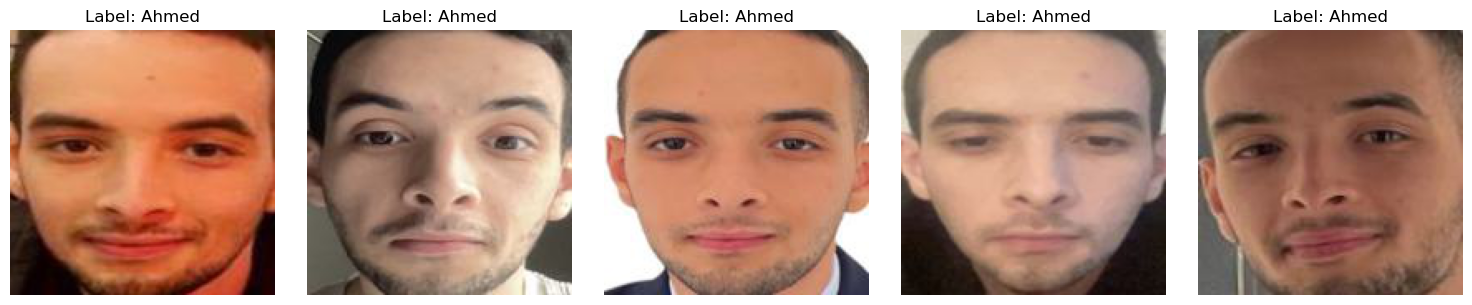

In [8]:
# Check that images align with labels

import matplotlib.pyplot as plt

def show_sample_images(dataset, idx_to_class, start_idx=0, end_idx=10):
    """
    Display a range of images from the dataset along with their actual labels.
    
    Args:
    - dataset: Your dataset object that returns (image, label_index) tuples.
    - idx_to_class: A dictionary mapping label indices to class names (actual labels).
    - start_idx (int): The start index of the range of images to display.
    - end_idx (int): The end index of the range of images to display.
    """
    num_samples = end_idx - start_idx
    fig, axs = plt.subplots(1, num_samples, figsize=(num_samples * 3, 3))
    for i, ax in enumerate(axs.flat, start=start_idx):
        if i >= end_idx:
            break
        image, label_index = dataset[i]
        image_np = image.permute(1, 2, 0).numpy()  # Adjust if your image tensor format differs
        actual_label = idx_to_class[label_index]
        
        ax.imshow(image_np)
        ax.set_title(f'Label: {actual_label}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
# Make sure to replace 'your_dataset' with your actual dataset object
# and provide the 'idx_to_class' mapping
show_sample_images(dataset, idx_to_class, start_idx=1, end_idx=6)



In [9]:
len(dataset)

439

In [10]:
# Train/ Test split - len(dataset) = 439
train_dataset, val_dataset = random_split(dataset,[400,39] )

len(train_dataset), len(val_dataset)

(400, 39)

In [11]:
# Dataloaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle= True)
val_loader = DataLoader(dataset=val_dataset, batch_size=32, shuffle= True)

In [12]:
len(train_loader), len(val_loader)

(13, 2)

In [13]:
img, label = next(iter(val_loader))
img.shape, label.shape

(torch.Size([32, 3, 160, 160]), torch.Size([32]))

### Phase 02: Face recognition 

In [14]:
# Define face recognition model
resnet_model = InceptionResnetV1(pretrained='vggface2').to(device)

In [15]:
# Print model layers to adjust for classification output
print(resnet_model)

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [16]:
class ActionClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        resnet_model = InceptionResnetV1(pretrained='vggface2').to(device)
        self.features = nn.Sequential(*list(resnet_model.children())[:-5])
     
        # Copy the original avgpool
        self.avgpool_1a = resnet_model.avgpool_1a
        
        self.dropout = resnet_model.dropout

        self.last_linear = resnet_model.last_linear

        self.last_bn = resnet_model.last_bn

        self.logits = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512, 46)  #46 classes
            )  

    def forward(self, x):
        out = self.features(x)
        out = self.avgpool_1a(out)
        out = self.dropout(out)
        out = torch.flatten(out, 1)
        out = self.last_linear(out)
        out = self.last_bn(out)
        out = self.logits(out)

        return out
        
    

tmpModel = ActionClassifier().to(device)
tmpImg, _ = next(iter(train_loader))
tmpImg = tmpImg.to(device)
tmpOut = tmpModel(tmpImg)
tmpOut.shape

torch.Size([32, 46])

In [17]:
# Freezing the features layer wweights
model = ActionClassifier().to(device)

for params in model.features.parameters():
    params.requires_grad = False

In [18]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [19]:
train_losses = []; train_accs = []
validation_losses = []; validation_accs = []

lr = 5e-2
n_epochs = 3

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)


for epoch in range(n_epochs):
    # Training Loop
    model.train()
    train_loss, train_acc = 0, 0
    
    for x_batch, y_batch in train_loader:  
            
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        y_logits = model(x_batch)
        loss = loss_fn(y_logits, y_batch)
        
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()    
        optimizer.step()
        
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # turn logits -> pred probs -> pred labels
        train_acc += accuracy_fn(y_true=y_batch, y_pred=y_pred) 
        
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    train_acc /= len(train_loader)
    train_accs.append(train_acc)
    
    # Validation Loop
    model.eval()
    validation_loss , validation_acc = 0, 0
    
    with torch.no_grad():
        for x_val, y_val in val_loader:

            x_val = x_val.to(device)
            y_val = y_val.to(device)

            y_logits = model(x_val)
            val_loss = loss_fn(y_logits, y_val)
            
            validation_loss += val_loss.item()
            
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
            validation_acc += accuracy_fn(y_true=y_val, y_pred=y_pred) 
        
    validation_loss /= len(val_loader)
    validation_losses.append(validation_loss)
    
    validation_acc /= len(val_loader)
    validation_accs.append(validation_acc)
    
    #Print out what's happening every 10 epochs
    print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {train_acc:.2f}% | val loss: {validation_loss:.5f}, val acc: {validation_acc:.2f}%")


Epoch: 0 | Loss: 2.43158, Accuracy: 53.61% | val loss: 1.04749, val acc: 92.19%
Epoch: 1 | Loss: 0.67196, Accuracy: 92.31% | val loss: 0.62786, val acc: 96.88%
Epoch: 2 | Loss: 0.37344, Accuracy: 96.63% | val loss: 0.35704, val acc: 98.44%


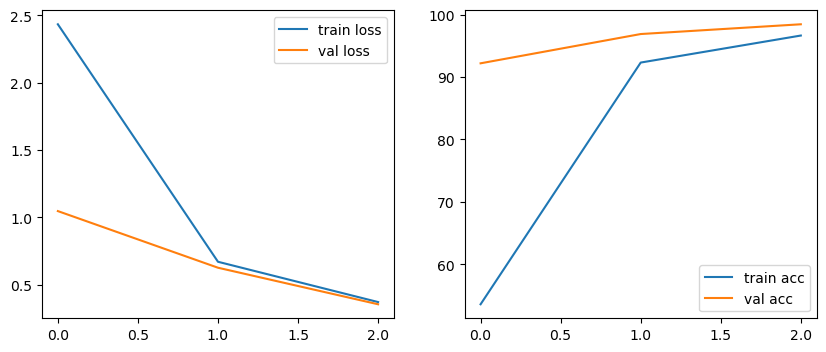

In [20]:
import matplotlib.pyplot as plt
# Making predictions
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(train_losses,  label="train loss"); 
ax[0].plot(validation_losses,  label="val loss"); 
ax[0].legend();

ax[1].plot(train_accs,  label="train acc");
ax[1].plot(validation_accs,  label="val acc"); 
ax[1].legend();

## Test Data

### Create a test_cropped folder 

In [21]:
test_transform = transforms.Compose([
    transforms.ToTensor()])

In [22]:


from pathlib import Path
from PIL import Image
from facenet_pytorch import MTCNN
import torch

# Initialize MTCNN
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(
    margin=14,
    keep_all=True,
    device=device,
    selection_method='center_weighted_size'
)


# Paths to the source and target directories
source_directory = Path('./samples/test')
target_directory = Path('./samples/test_cropped')
target_directory.mkdir(parents=True, exist_ok=True)  # Ensure target directory exists

# Function to process a batch of images
def process_batch(images, batch_paths):
    crops = [str(p).replace(str(source_directory), str(target_directory)) for p in batch_paths]
    # Ensure each target directory exists
    for crop_path in crops:
        Path(crop_path).parent.mkdir(parents=True, exist_ok=True)
    mtcnn(images, save_path=crops)
    return crops

# Processing images
crop_paths = []
for person_folder in source_directory.iterdir():
    if person_folder.is_dir():
        # Adjust glob patterns to include different file extensions
        image_files = [image_file for ext in ['*.jpg', '*.JPG', '*.jpeg', '*.JPEG','*.png','*.PNG'] 
                       for image_file in person_folder.glob(ext)]
        for image_file in image_files:
            with Image.open(image_file) as img:
                img = img.convert('RGB')  # Ensure image is in RGB
                crops = test_transform(img)
                crops = process_batch([img], [image_file])
                crop_paths.extend(crops)
                print(f'Processed {image_file}')

print("All images processed and saved successfully.")


Processed samples/test/Gautier/2024-02-24 18-08-49.jpg


Processed samples/test/Alexandre/WIN_20240223_16_57_42_Pro.jpg
Processed samples/test/Chadi/WIN_20240229_12_22_03_Pro.jpg
Processed samples/test/Ruicong/WechatIMG665.jpg
Processed samples/test/Shiqing/shiqing (10).jpg
Processed samples/test/Namrata/1_11.jpg
Processed samples/test/Martino/martino11.jpg
Processed samples/test/Romain/10.JPG
Processed samples/test/Fulin/IMG_9281.jpg
Processed samples/test/Eze/WIN_20240302_17_59_38_Pro.jpg
Processed samples/test/Tristan/E00CF3BC-5DCF-4DE6-9B09-1F63BA6A36C7.jpg
Processed samples/test/Braxton/IMG_1148.jpg
Processed samples/test/Gabriel/WIN_20240227_10_29_36_Pro.jpg
Processed samples/test/JeanLuis/11.jpg
Processed samples/test/Benjamin/img_5472.jpg
Processed samples/test/Xinyue/20240225165247.jpg
Processed samples/test/Qinyi/f092c659-9274-45cf-bdcd-bdde0d97efa7.jpg
Processed samples/test/JiaXin/IMG_1075.jpg
Processed samples/test/Qiqi/1.JPG
Processed samples/test/Charlie/Screenshot_20230302-225001.jpg
Processed samples/test/AswinSri/11.jpg
Pro

### Test dataset and data loader

In [23]:
test_dataset = datasets.ImageFolder(root = './samples/test_cropped', transform=test_transform)
test_loader = DataLoader(dataset=test_dataset, batch_size=32)

In [24]:
test_idx_to_class = {i:c for c, i in test_dataset.class_to_idx.items()}
test_idx_to_class

{0: 'Ahmed',
 1: 'Alexandre',
 2: 'AswinSri',
 3: 'Ata',
 4: 'Benjamin',
 5: 'Braxton',
 6: 'Chadi',
 7: 'Charlie',
 8: 'Eze',
 9: 'Fulin',
 10: 'Gabriel',
 11: 'Gautier',
 12: 'HoangMinhThu',
 13: 'Jad',
 14: 'JeanLuis',
 15: 'JiaXin',
 16: 'Jing',
 17: 'JiyuanPeter',
 18: 'KingMan',
 19: 'Manuel',
 20: 'Maria',
 21: 'Marouane',
 22: 'Martino',
 23: 'Mathieu',
 24: 'Michelle',
 25: 'Mohamed',
 26: 'Muyun',
 27: 'Namrata',
 28: 'Nicholas',
 29: 'Peiwen',
 30: 'Qinyi',
 31: 'Qiqi',
 32: 'Romain',
 33: 'Ruicong',
 34: 'Saeed',
 35: 'Selin',
 36: 'Selle',
 37: 'Shiqing',
 38: 'Shiyao',
 39: 'SongRim',
 40: 'Thomas',
 41: 'Tristan',
 42: 'Valentin',
 43: 'Wujiachen',
 44: 'Xinyue',
 45: 'Yuekai'}

### Test the model

In [25]:

test_acc = 0

model.eval()
epochs  = 2


with torch.no_grad():
        for x_test, y_test in test_loader:

            x_test = x_test.to(device)
            y_test = y_test.to(device)

            y_logits = model(x_test)
            
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
            test_acc += accuracy_fn(y_true=y_test, y_pred=y_pred) 
        
test_acc /= len(test_loader)
print(f"Test accuracy: {test_acc:.2f}%")

Test accuracy: 69.38%


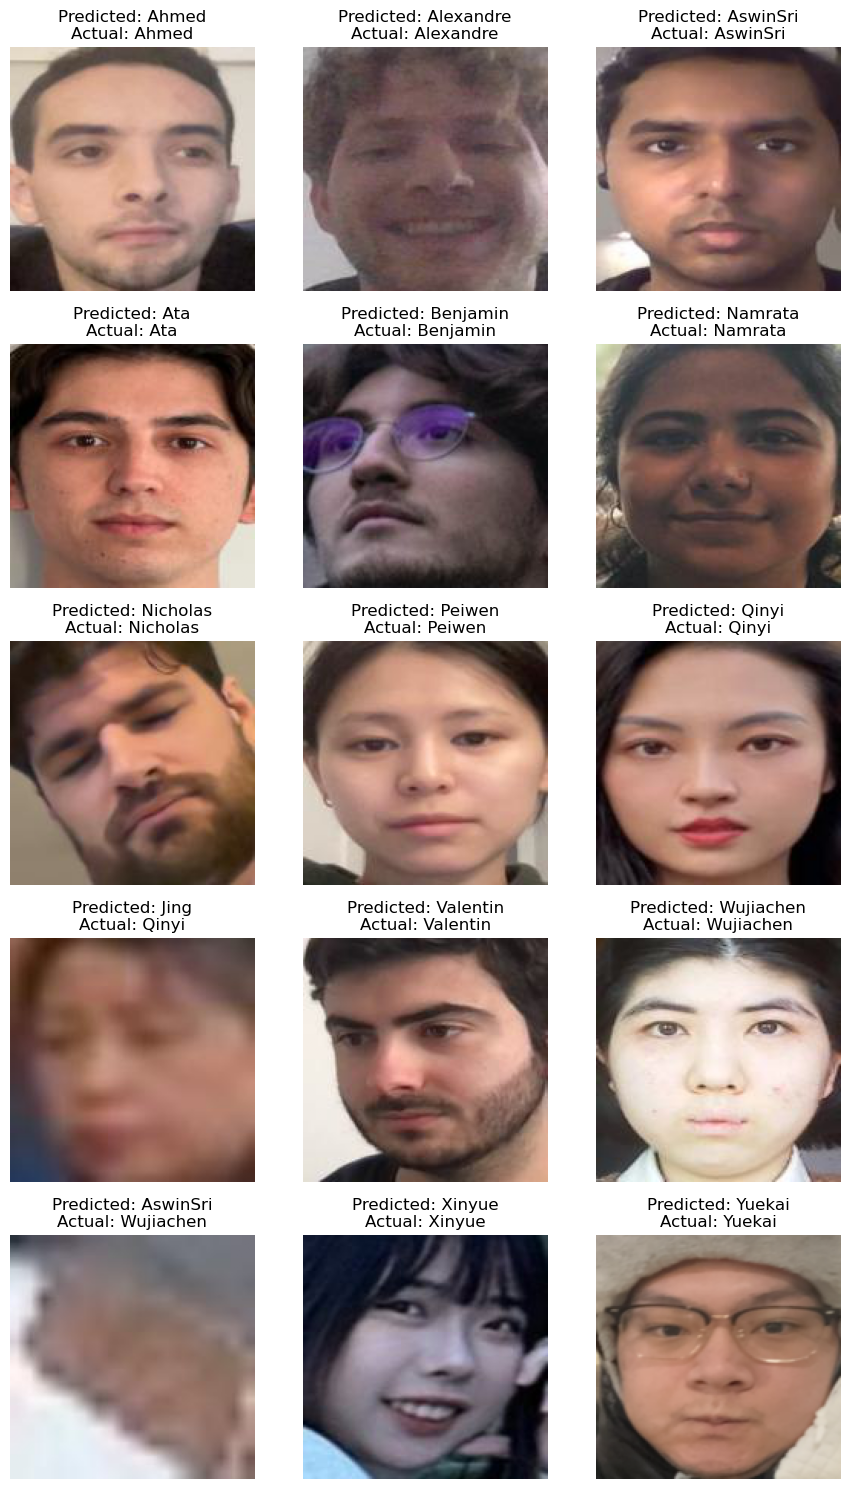

In [26]:
## Check outputs

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'class_to_idx' is a dictionary mapping folder names to class indices,
# we need the reverse mapping to get the folder name from the predicted class index


def plot_images(images, actuals, preds, ncols=3):
    nrows = np.ceil(len(images) / ncols).astype(int)
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*3))
    axes = axes.flatten()
    for i, (img, actual, pred) in enumerate(zip(images, actuals, preds)):
        ax = axes[i]
        img = img.permute(1, 2, 0)  # Change CxHxW to HxWxC if necessary
        ax.imshow(img.cpu().numpy())
        ax.set_title(f"Predicted: {pred}\nActual: {actual}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Modify your loop to collect a few examples for plotting
images_to_plot = []
actual_labels = []
predicted_labels = []

model.eval()
with torch.no_grad():
    for x_test, y_test in test_loader:
        x_test = x_test.to(device)
        y_test = y_test.to(device)

        y_logits = model(x_test)
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

        # Convert indices to class names (or folder names)
        actuals = [idx_to_class[idx.item()] for idx in y_test]
        preds = [idx_to_class[idx.item()] for idx in y_pred]

        # Add data for plotting (note: choose a few images to avoid memory issues)
        images_to_plot.extend(x_test[:min(5, len(x_test))])  # Adjust number as needed
        actual_labels.extend(actuals[:min(5, len(actuals))])
        predicted_labels.extend(preds[:min(5, len(preds))])

# Plotting outside the loop
plot_images(images_to_plot, actual_labels, predicted_labels)


---

### Tracking Faces

In [27]:
transform = transforms.Compose([
   transforms.Resize((160,160)),
   transforms.ToTensor()
]) 

In [28]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(
    keep_all=False,
    device=device
)

In [29]:
def predict_frame(frame, model, transform, device, mtcnn):
    # Convert OpenCV frame to PIL image
    pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Detect faces
    boxes, _ = mtcnn.detect(pil_image)

    if boxes is None:
        return None, None, None  # Ensure three values are returned even if no face is detected

    predictions = []
    probabilities = []  # List to store probabilities

    for box in boxes:
        # Crop and transform face
        face = pil_image.crop((box[0], box[1], box[2], box[3])) 
        face = transform(face).unsqueeze(0).to(device)

        # Predict
        with torch.no_grad():
            outputs = model(face)
            _, predicted = torch.max(outputs.data, 1)
            predictions.append(predicted.item())
            # Calculate probabilities
            prob = F.softmax(outputs, dim=1)
            top_prob, top_catid = torch.max(prob, dim=1)
            probabilities.append(top_prob.squeeze().item())  # Store the highest probability

    return boxes, predictions, probabilities


In [31]:
# Webcam 
import torch.nn.functional as F

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    boxes, predictions, probabilities = predict_frame(frame, model, transform, device, mtcnn)

    if boxes is not None:
        for box, predicted_class_idx,probability in zip(boxes, predictions, probabilities):
            
            # Get prediction name
            predicted_class_name =   idx_to_class[predicted_class_idx]

            # Print classification probability
            display_text = f"{predicted_class_name} ({probability*100:.2f}%)"

            # Visuals display in webcam
            cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])),  (255, 192, 203), 2)
            cv2.putText(frame, display_text, (int(box[0]), int(box[1]-10)), cv2.FONT_HERSHEY_COMPLEX, 0.5,  (255, 192, 203), 1)


    cv2.imshow('Video Feed', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows() 